   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


✅ Best Match:
Query: When do classes start for the next semester?
Answer: Classes for the next semester start on January 5th.


<ipython-input-1-cfb913b678c7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Student Query'], y=df['Similarity'], palette='viridis')


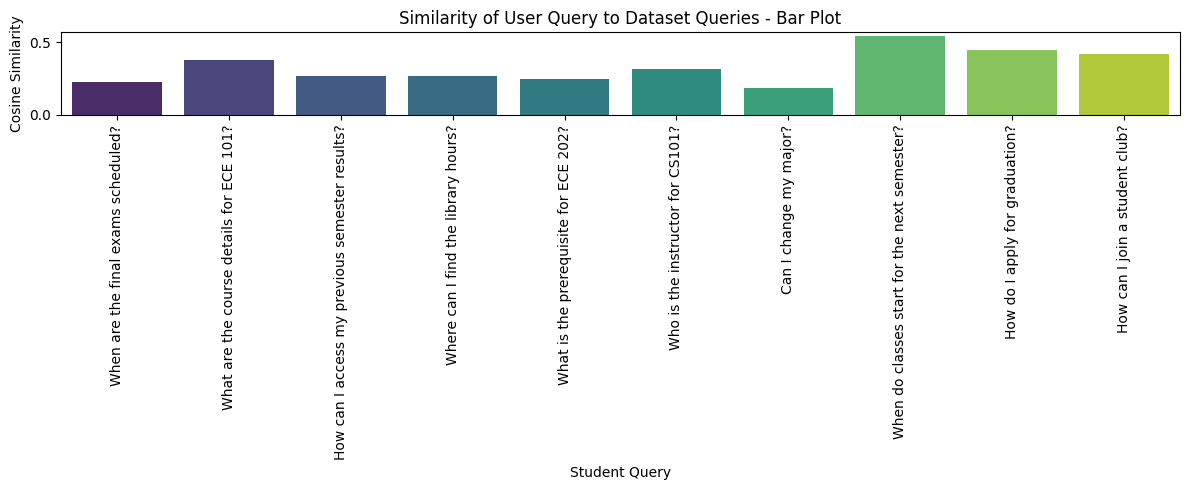

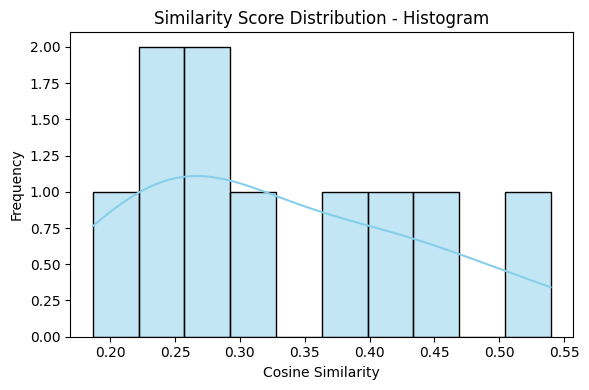

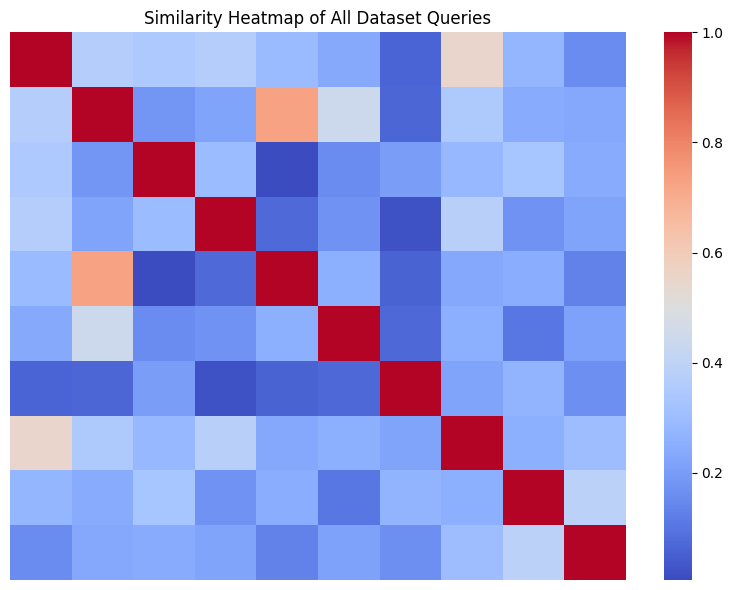

In [1]:
# Install required libraries
!pip install sentence-transformers pandas matplotlib seaborn openpyxl

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer, util

# Load dataset
df = pd.read_excel('dataset.xlsx')
assert 'Student Query' in df.columns and 'Answer' in df.columns, "Columns missing"
df = df.dropna(subset=['Student Query', 'Answer'])

# Load Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed dataset queries
df['Query Embedding'] = df['Student Query'].apply(lambda x: model.encode(x, convert_to_tensor=True))

# === User Input ===
user_query = "How do I register for classes?"  # Change this to test
user_query_embedding = model.encode(user_query, convert_to_tensor=True)

# Compute cosine similarity
df['Similarity'] = df['Query Embedding'].apply(lambda x: util.cos_sim(user_query_embedding, x)[0][0].item())

# Get best match
best_idx = df['Similarity'].idxmax()
print(f"\n✅ Best Match:\nQuery: {df.loc[best_idx, 'Student Query']}\nAnswer: {df.loc[best_idx, 'Answer']}")

# === Visualizations ===

## 1. Bar Plot of Similarity Scores
plt.figure(figsize=(12, 5))
sns.barplot(x=df['Student Query'], y=df['Similarity'], palette='viridis')
plt.xticks(rotation=90)
plt.title("Similarity of User Query to Dataset Queries - Bar Plot")
plt.ylabel("Cosine Similarity")
plt.xlabel("Student Query")
plt.tight_layout()
plt.show()

## 2. Histogram of Similarity Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Similarity'], bins=10, kde=True, color='skyblue')
plt.title("Similarity Score Distribution - Histogram")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## 3. Heatmap of Dataset Query Similarities
import torch
embeddings = torch.stack(list(df['Query Embedding']))
sim_matrix = util.cos_sim(embeddings, embeddings).numpy()

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Similarity Heatmap of All Dataset Queries")
plt.tight_layout()
plt.show()
